In [5]:
import matplotlib.pyplot as plt
import numpy as np

import getData
import plotData

norm_root_folder = "/scratch/mellis/TullyModelData/Big_ThesisChap_Test/Ehrenfest_Data/NormCons_vs_ElecDT"
ener_root_folder = "/scratch/mellis/TullyModelData/Big_ThesisChap_Test/Ehrenfest_Data/EnerCons_vs_NuclDT"
pops_root_folder = "/scratch/mellis/TullyModelData/Big_ThesisChap_Test/Ehrenfest_Data/Pops_Compare2"

# Plot Norm vs Electronic Timestep
git commit = 26e80904331863b03d32eb2

<IPython.core.display.Javascript object>


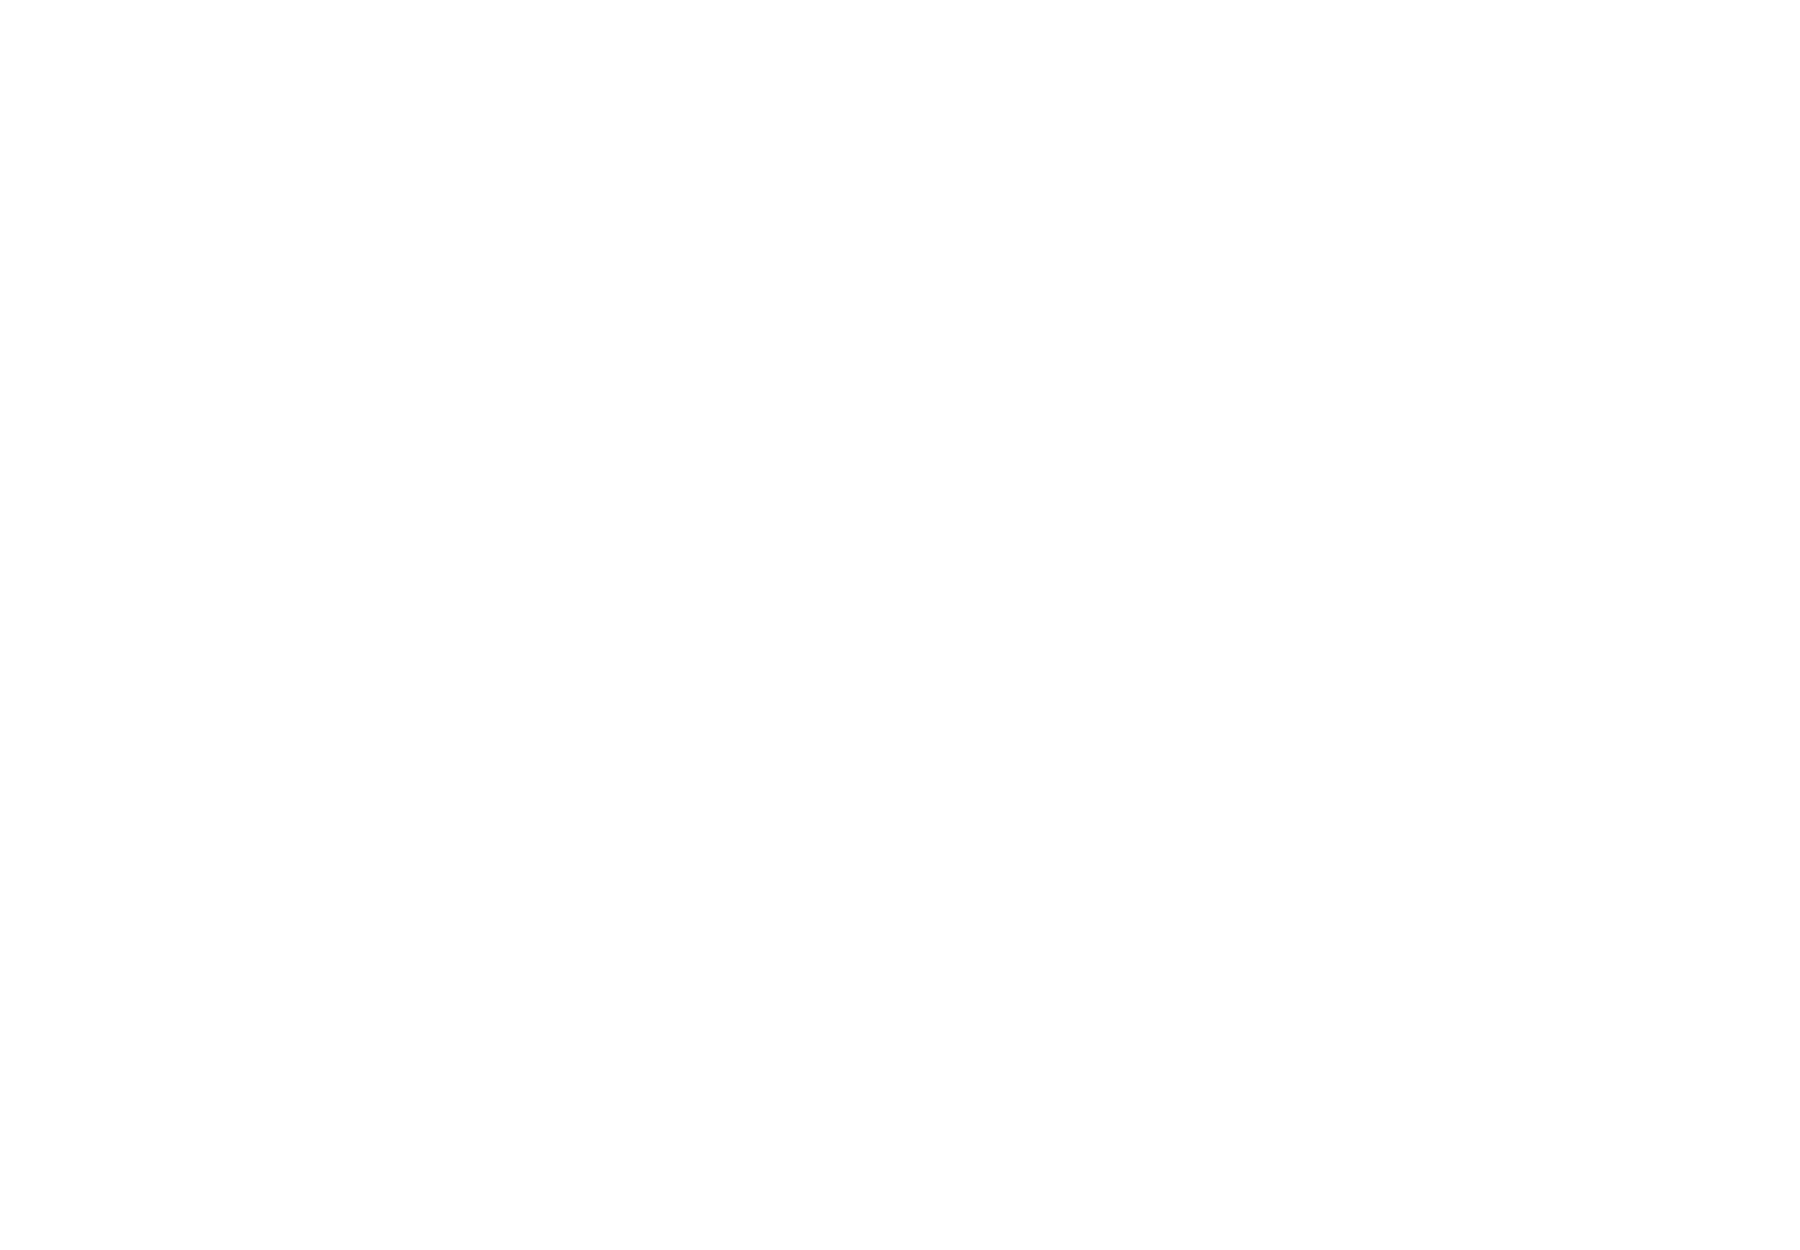

In [2]:
%matplotlib notebook
allData = getData.NestedSimData(norm_root_folder, ['|C|^2', 'time'])

fa = plt.subplots(2, 2)

model = 1
for x in range(2):
    for y in range(2):
        ax = fa[1][x][y]
        ax.set_title("Model %i" % model, fontsize=25)
        plotData.plotNormVsElecDt(allData, model, fa[0], ax)
        if x == 0:
            ax.set_xlabel("")
        if y == 1:
            ax.set_ylabel("")
        model += 1
        
plt.tight_layout()
plt.show()

# Plot Energy Conservation vs Nuclear Timestep
git commit = 26e80904331863b03d32eb2

<IPython.core.display.Javascript object>


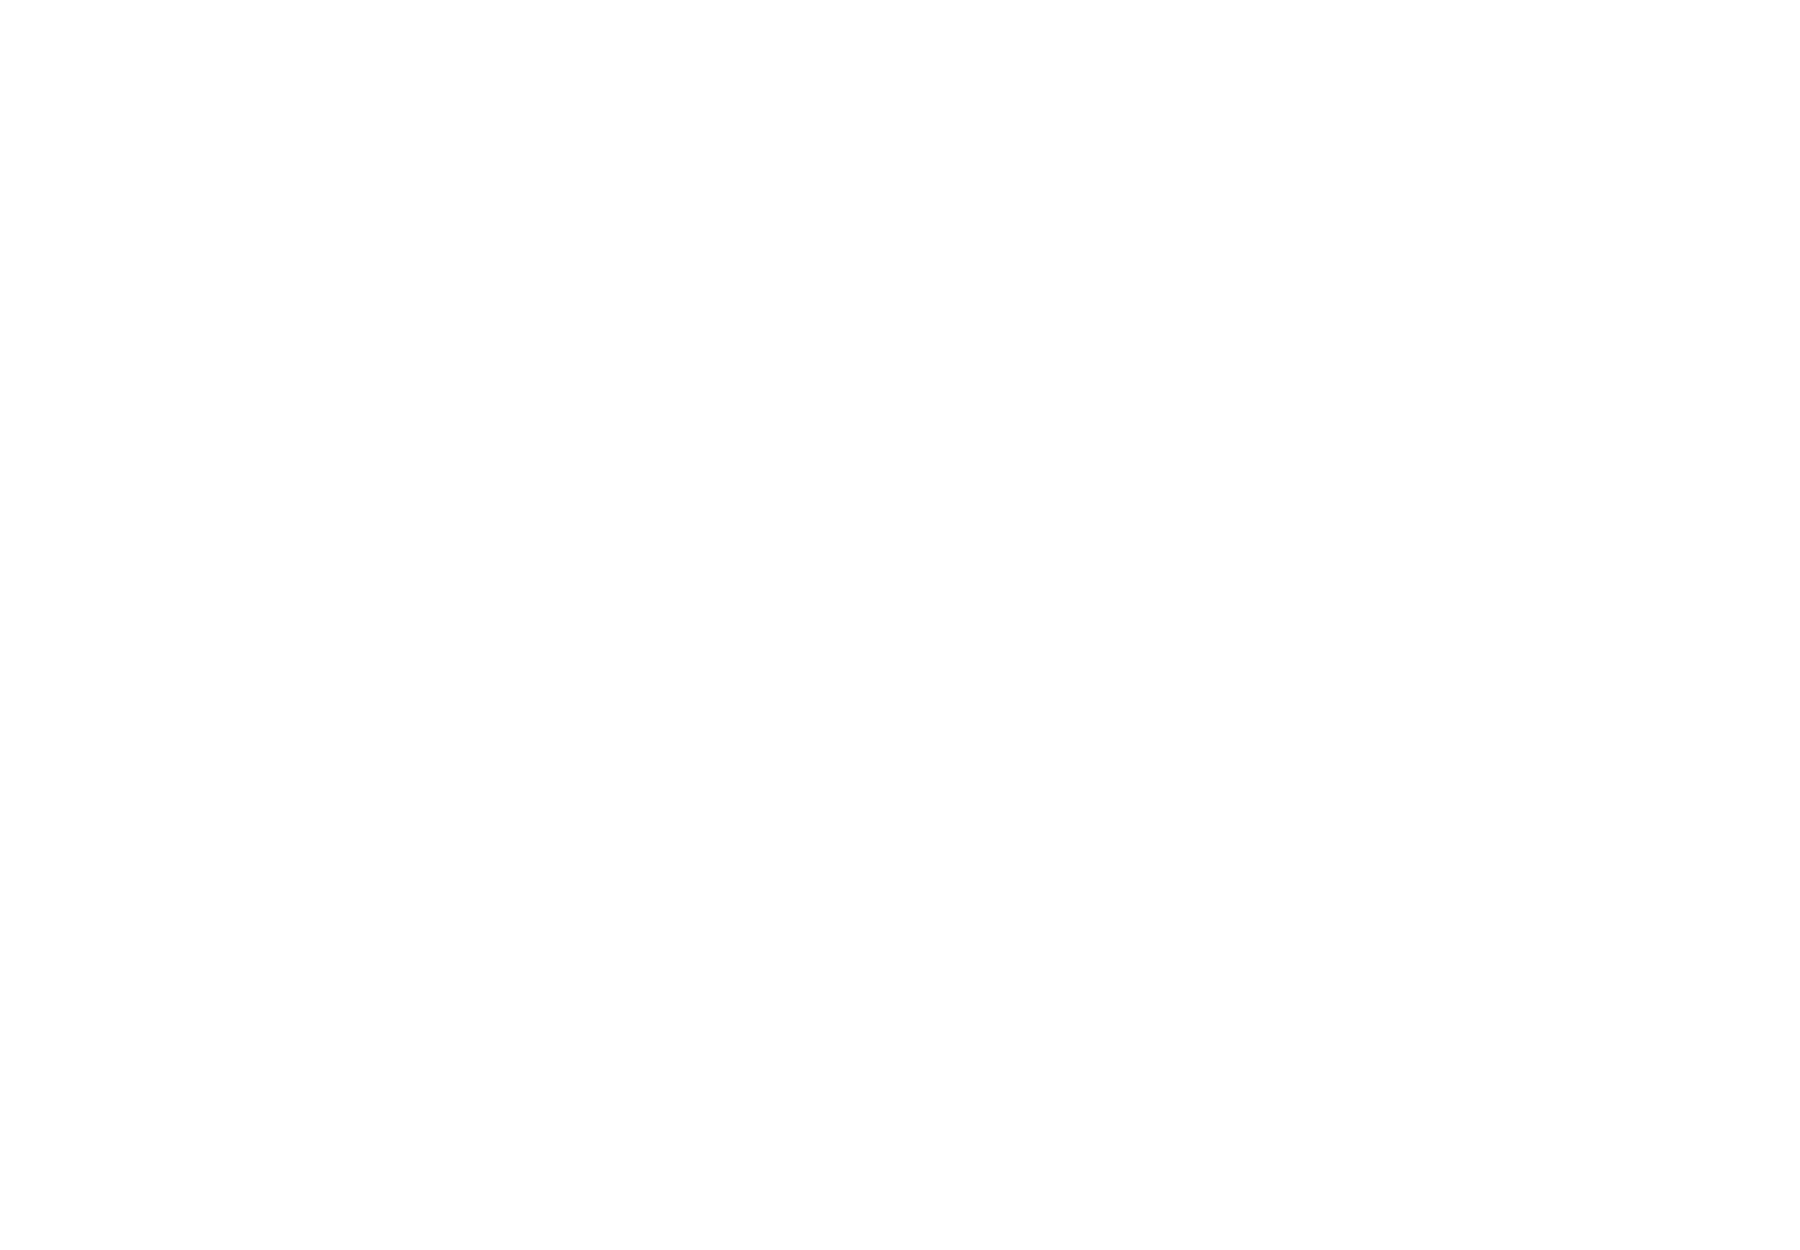

SystemExit: The electronic timesteps are different!

/homes/mellis/miniconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2886: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
import getData
allData = getData.NestedSimData(ener_root_folder,
                                ["time", 'ener', "|C|^2", "vel"])

fa = plt.subplots(2, 2)

model = 1
for x in range(2):
    for y in range(2):
        ax = fa[1][x][y]
        ax.set_title("Model %i" % model, fontsize=25)
        plotData.plotEnerVsNuclDt(allData, model, fa[0], ax)
        if x == 0:
            ax.set_xlabel("")
        if y == 1:
            ax.set_ylabel("")
        model += 1

plt.tight_layout()
plt.show()


# Plot the Populations vs Literature
git commit = 26e80904331863b03d32eb2

<IPython.core.display.Javascript object>


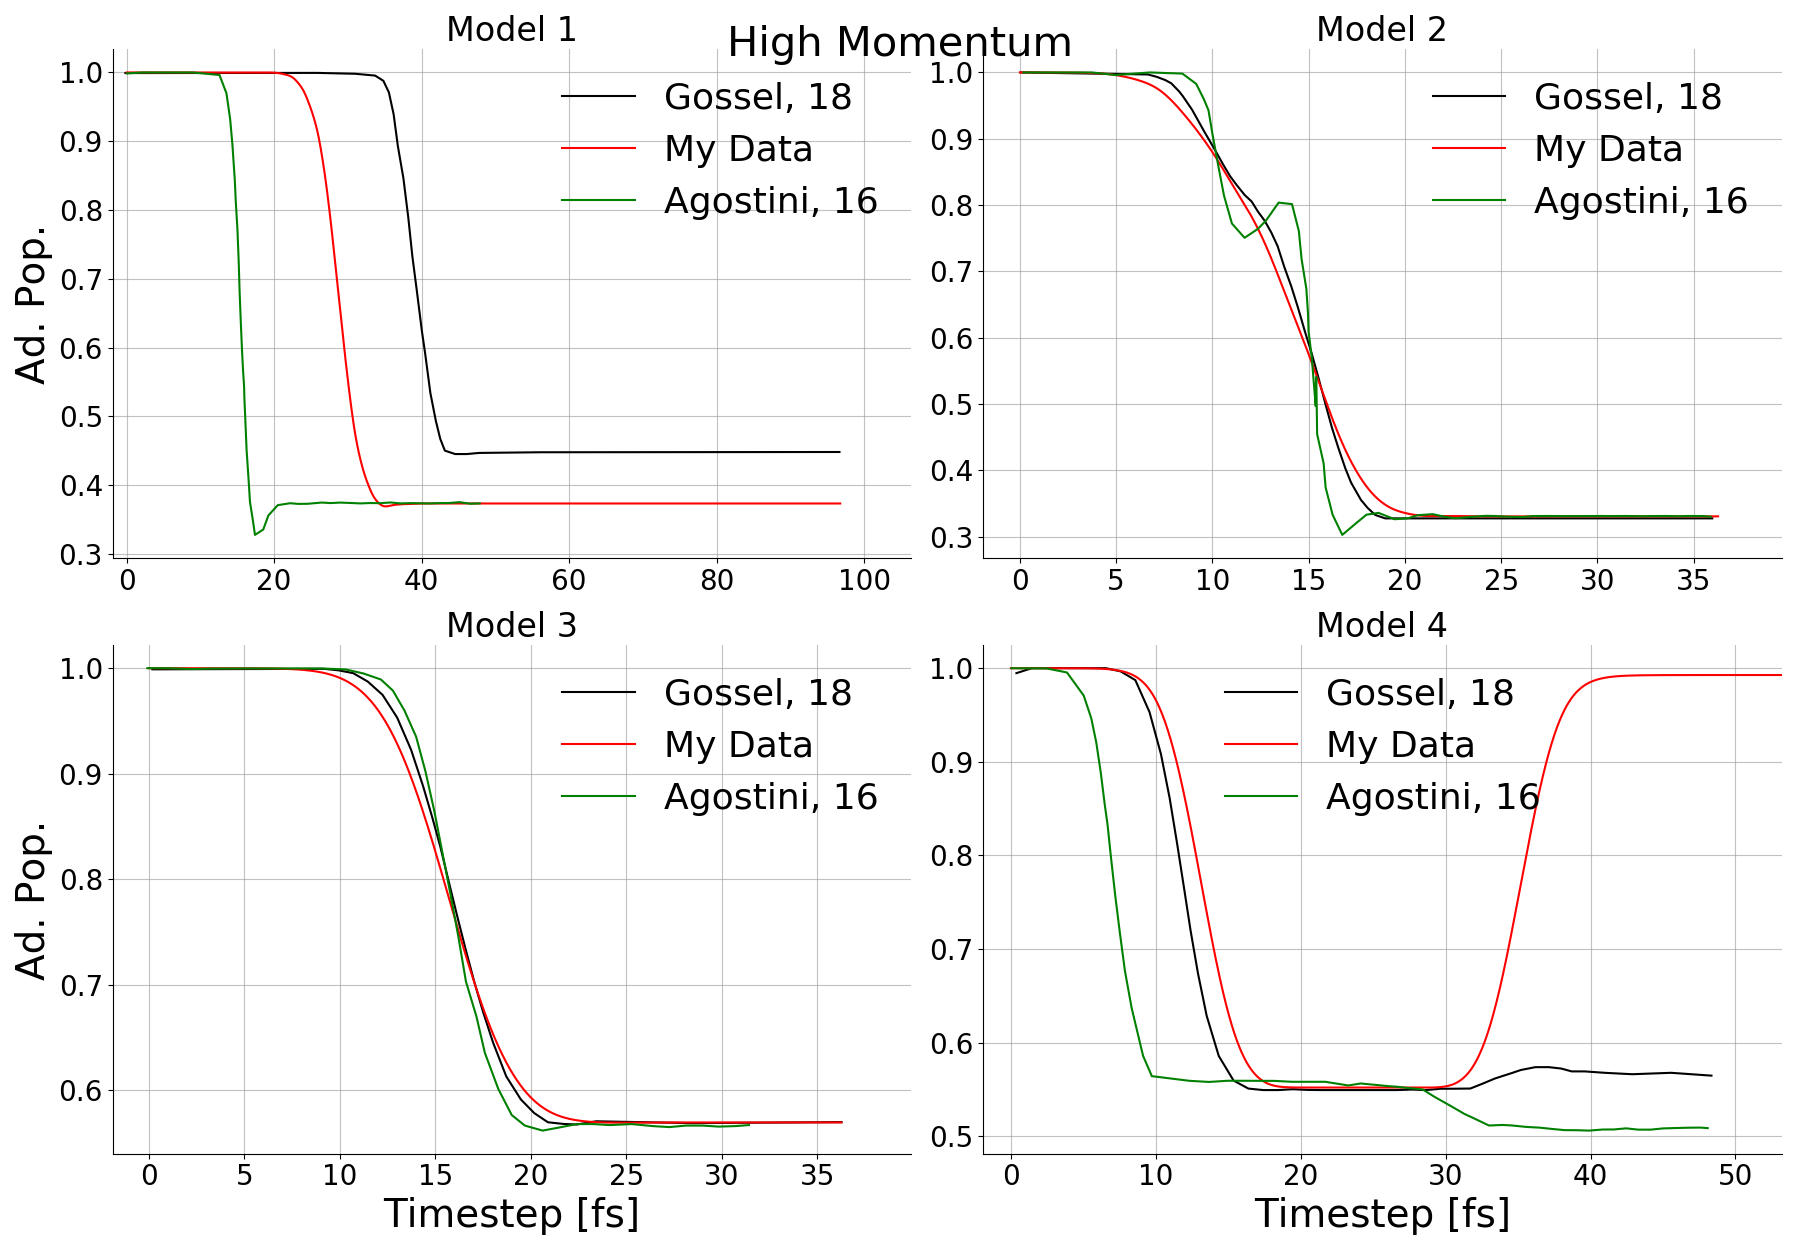

[9675, 9675, 9675, 9675]
1
high
[3628, 3628, 3628, 3628, 3628, 3628]
2
high
[3628, 3628, 3628, 3628, 3628, 3628]
3
high
[7256, 7256, 7256, 7256]
4
high


<IPython.core.display.Javascript object>


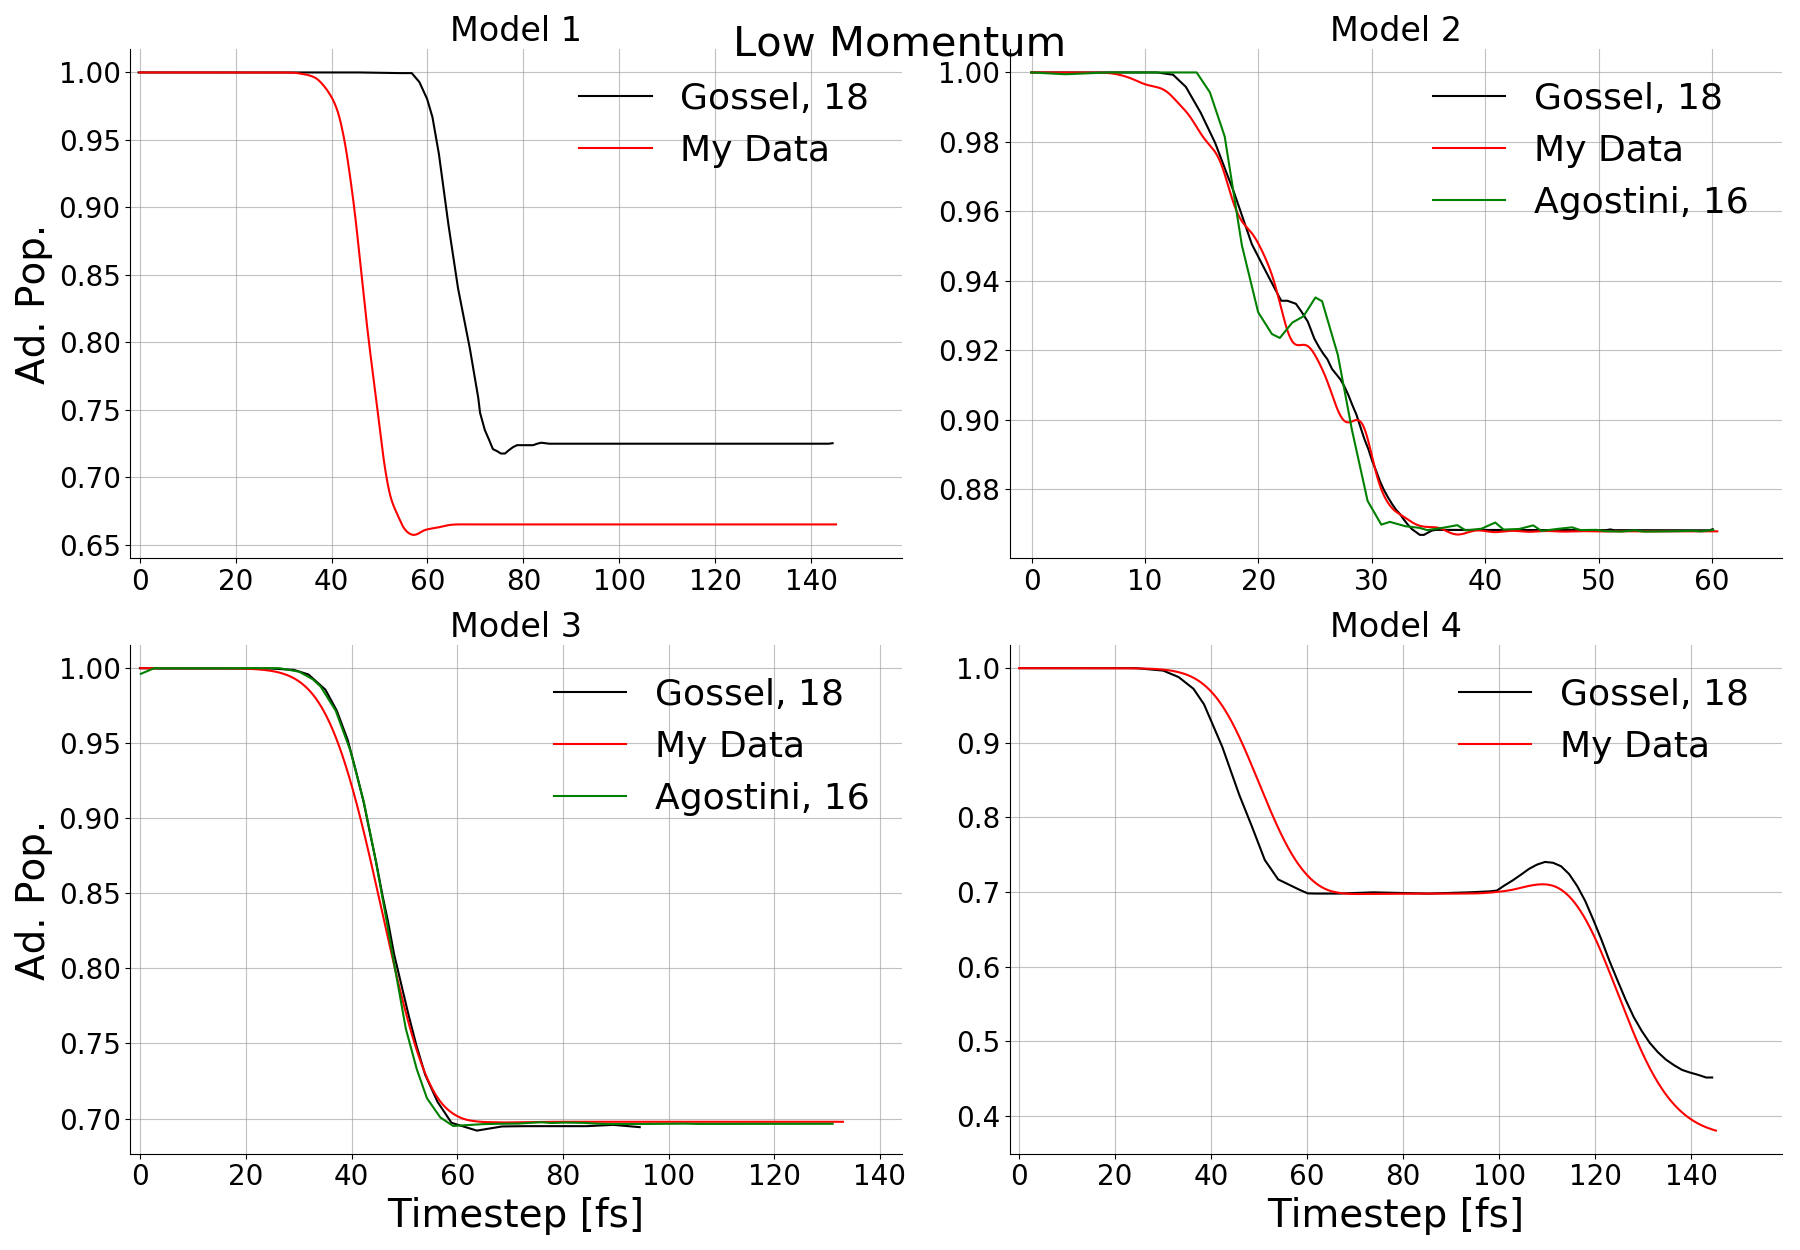

[14513, 14513, 14513, 14513, 14513]
1
low
[6047]
2
low
[13303, 13303, 13303, 13303, 13303]
3
low
[14513, 14513, 14513, 14513]
4
low


In [10]:
%matplotlib notebook

import getData

allData = getData.NestedSimData(pops_root_folder, ['time', '|C|^2'])
fredData = getData.FredericaData()
gossData = getData.GosselData()


for mom in ['high', 'low']:
    model = 1
    f, a = plt.subplots(2, 2)


    for x in range(2):
        for y in range(2):
            ax = a[x][y]
            dfFredDeco = getattr(fredData, "mod%i_%sMom_deco" % (model, mom))
            dfFredPop = getattr(fredData, "mod%i_%sMom_pops" % (model, mom))
            fredMom = getattr(fredData, "mod%i_%sMom" % (model, mom))

            dfGossDeco = getattr(gossData, "mod%i_%sMom_deco" % (model, mom))
            dfGossPop = getattr(gossData, "mod%i_%sMom_pops" % (model, mom))
            gossMom = getattr(gossData, "mod%i_%sMom" % (model, mom))

            myData = allData.query_data({'tullyModel': model, 'velInit': gossMom * 5e-4})
            myPops = [data.adPop for data in myData]
            if len(myPops) > 0:
                print([len(pops) for pops in myPops])
                print(model)
                print(mom)
                myPops = [np.mean(pops, axis=1) for pops in myPops]
                myPops = np.mean(myPops, axis=0)

            ax.plot(dfGossPop['Eh_x']*0.024188843265857, dfGossPop['Eh_y'], label="Gossel, 18", color='k')
            if len(myPops) > 0:
                ax.plot(myData[0].times*0.024188843265857, myPops[:, 0], label="My Data", color='r')
            if gossMom == fredMom:
                ax.plot(dfFredPop['Eh_x']*0.024188843265857, dfFredPop['Eh_y'], label="Agostini, 16", color='g')

            xlimmax = max(np.nanmax(dfGossPop['Eh_x']), np.nanmax(dfFredPop['Eh_x']))*0.024188843265857*1.1
            ax.set_xlim([-1.9, xlimmax])
            if x == 1:
                ax.set_xlabel("Timestep [fs]")
            if y == 0:
                ax.set_ylabel("Ad. Pop.")
            ax.set_title("Model %i" % model, fontsize=24)

            ax.legend()
            model += 1

    f.suptitle("%s Momentum" % mom.title(), fontsize=30)
    plt.tight_layout()
